# Relational database visualization
Notebook created for visualization of relational database created for need of VRAcuity analysis. Presenting data storage format, data distributions, including: 

1. Rat Rehavior - position and orientation in 3 axes
2. Events Log - the experiment course - speed, direction and visibility of the stimulus
3. Sessions data - including the additional data about each session

Each datasets additionally consists of session id, representing data collected in separate experiments.

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/preprocessed/'

dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions').set_index('index')

In [2]:
dfsession

,session_id,rat_id,date,experimenter,original_name,video_name,VRspeed
index,,,,,,,
0,0,VR-5A,2017-07-13 05.09.09.088 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC,VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC-Came...,[ 0. 7. 14. 28.]
0,1,VR-3A,2017-07-13 04.11.56.036 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC,VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC-Came...,[ 0. 7. 14. 28.]
0,2,VR-3A,2017-07-13 04.27.09.355 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC,VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC-Came...,[ 0. 7. 14. 28.]
0,3,VR-4A,2017-07-13 02.39.20.315 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC-Came...,[ 0. 7. 14. 28.]
0,4,VR-2A,2017-07-13 03.19.28.235 PM,Eduardo Blanco-Hernandez,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU-Came...,[ 0. 7. 14. 28.]
0,5,VR-1B,2017-07-13 03.53.42.156 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC-Came...,[ 0. 7. 14. 28.]
0,6,VR-2B,2017-07-13 03.05.18.468 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC-Came...,[ 0. 7. 14. 28.]
0,7,VR-1A,2017-07-13 03.38.35.628 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC-Came...,[ 0. 7. 14. 28.]


In [3]:
dfevent.head()

,Frame,Time,MotiveExpTimeSecs,visible,speed,session_id
index,,,,,,
0,0,0.000000,0.0,0,0.0,0
1,0,0.000000,0.0,0,0.0,0
2,1,0.004167,0.0,0,0.0,0
3,2,0.008333,0.0,0,0.0,0
4,3,0.012500,0.0,0,0.0,0


In [ ]:
dfrat.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
index,,,,,,,,,
0,0,0.000000,-0.057399,0.070985,-0.050572,-0.636110,-0.763631,-0.110595,0
1,1,0.004167,-0.057420,0.070951,-0.050517,-0.635684,-0.763778,-0.112020,0
2,2,0.008333,-0.057503,0.070895,-0.050505,-0.636720,-0.762427,-0.115295,0
3,3,0.012500,-0.057525,0.070861,-0.050480,-0.636537,-0.762167,-0.117995,0
4,4,0.016667,-0.057545,0.070851,-0.050470,-0.635629,-0.762408,-0.121281,0


## Rat Behavior
Distributions of orientation and postion of the animal, including all experiments and per experiment analysis.

## Position:

In [ ]:
# POSITION
pos_l = dfrat.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Position', value_vars=['X_Pos', 'Y_Pos', 'Z_Pos'], var_name='Dimension'
          )
#pos_l.head()

In [ ]:
g = sns.FacetGrid(col='Dimension', data=pos_l, size=4)
g.map(sns.distplot, 'Position');

In [ ]:
g = sns.FacetGrid(col='Dimension', hue='session_id', data=pos_l, size=4)
g.map(sns.distplot, 'Position');

In [ ]:
g = sns.FacetGrid(col='session_id', hue='Dimension', data=pos_l, size=3, col_wrap=4)
g.map(sns.distplot, 'Position');

In [ ]:
import matplotlib
matplotlib.rcParams.keys()
matplotlib.rcParams['grid.linewidth'] = 0

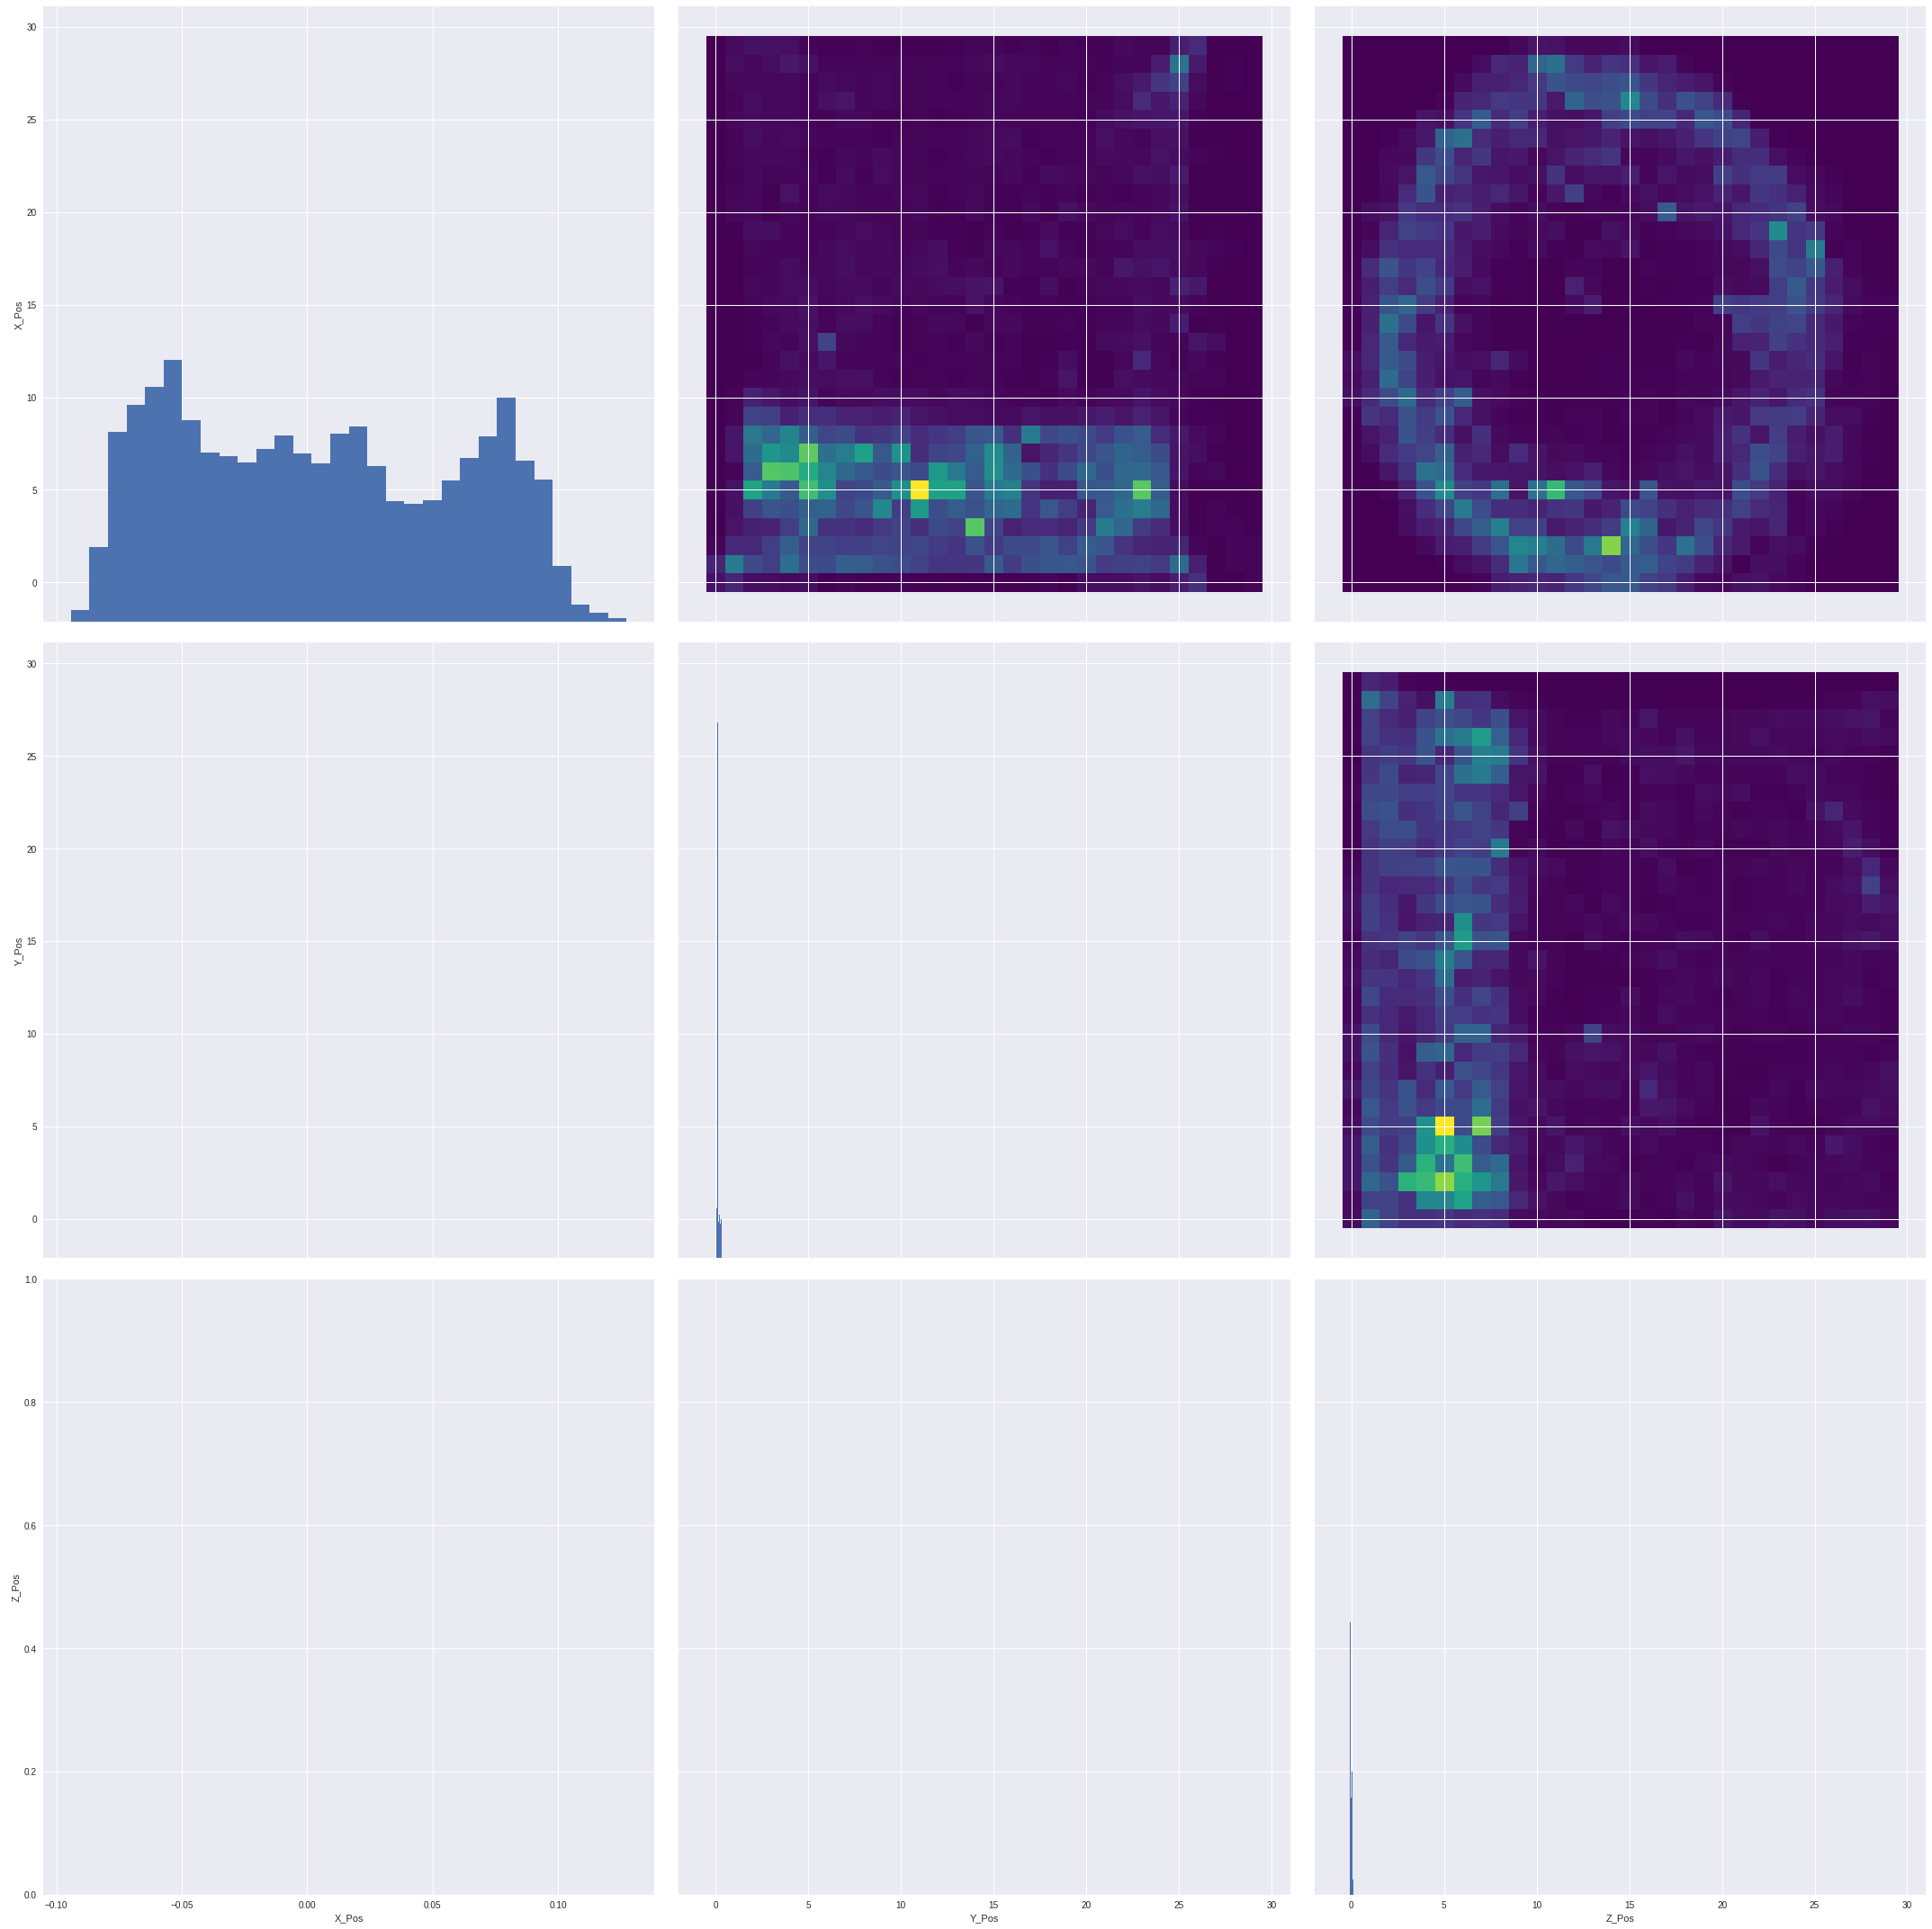

In [2]:
from matplotlib import colors


def make_heatmap(x, y, bins=20, cmap='viridis', norm=colors.Normalize(), **kwargs):
    hist = np.histogram2d(x, y, bins=bins)[0]
    return plt.imshow(hist, cmap=cmap, origin='lower', norm=norm)
    
g = sns.PairGrid(data=dfrat, vars=['X_Pos', 'Y_Pos', 'Z_Pos'], size=10)
g.map_upper(make_heatmap, bins=30)
g.map_diag(plt.hist, bins=30)


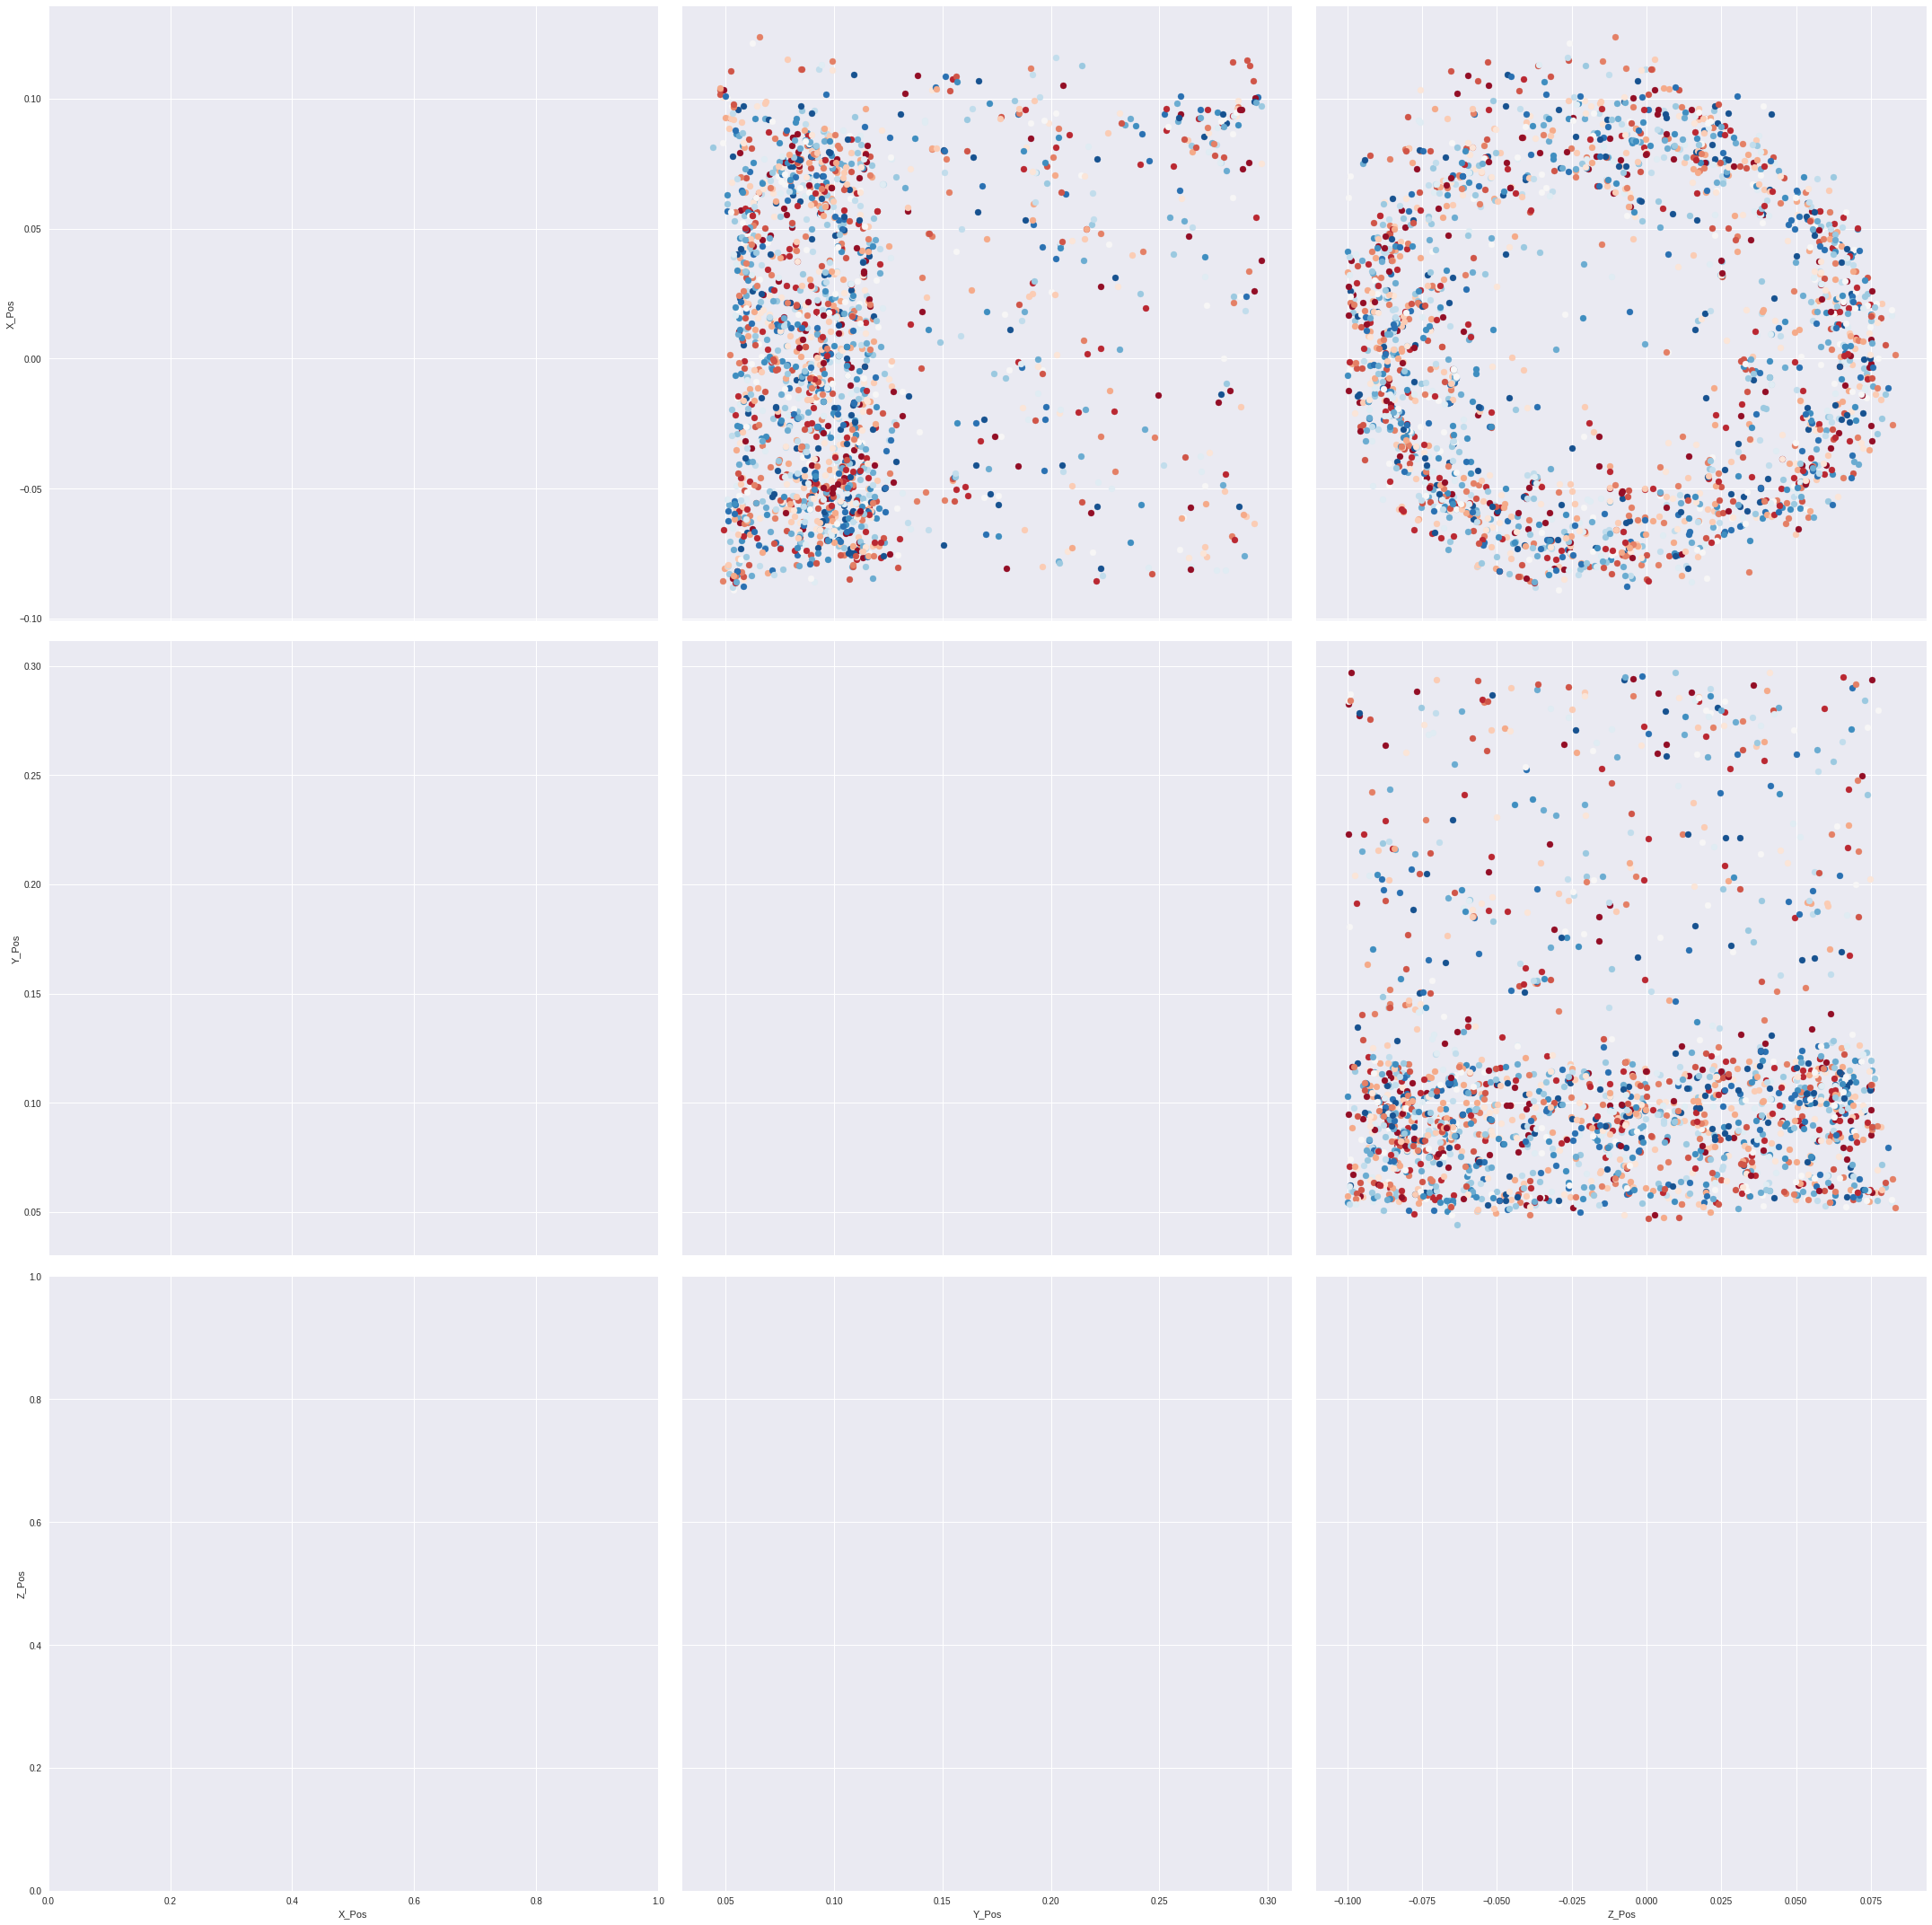

In [8]:
g = sns.PairGrid(data=dfrat.sample(2000), vars=['X_Pos', 'Y_Pos', 'Z_Pos'], size=10, hue='X_Ori', palette= sns.color_palette("RdBu_r", 15) )
g.map_upper(plt.scatter)


In [5]:
sns.pairplot?

Signature: sns.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each
variable in ``data`` will by shared in the y-axis across a single row and
in the x-axis across a single column. The diagonal Axes are treated
differently, drawing a plot to show the univariate distribution of the data
for the variable in that column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class`PairGrid`
directly if you need more flexibility.

Parameters
----------
data : DataFrame
    Tidy (long-form) dataframe where each column is a variable 

In [ ]:
sns.pairplot(dfrat.sample(100), vars=['X_Pos', 'Y_Pos', 'Z_Pos'], plot_kws={"s": 3, 'alpha':.3}, size=10, hue='Y_Pos');

In [ ]:
sns.pairplot(dfrat, vars=['X_Pos', 'Y_Pos', 'Z_Pos'], hue='session_id', plot_kws={'s': 3, 'alpha': 0.4});
# reduce point 

In [ ]:
sns.factorplot(x='Dimension', y='Position', col='session_id', data=pos_l, kind='box');
sns.factorplot(x='Dimension', y='Position', data=pos_l, kind='box');

## Orientation:

In [ ]:
# ORIENTATION
ori_l = dfrat.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Orientation', value_vars=['X_Ori', 'Y_Ori', 'Z_Ori'], var_name='Dimension'
          )

In [ ]:
g = sns.FacetGrid(col='Dimension', data=ori_l, size=4)
g.map(sns.distplot, 'Orientation');

In [ ]:
g = sns.FacetGrid(col='Dimension', hue='session_id', data=ori_l, size=4)
g.map(sns.distplot, 'Orientation');

In [ ]:
g = sns.FacetGrid(col='session_id', hue='Dimension', data=pos_l, size=3, col_wrap=4)
g.map(sns.distplot, 'Position');

In [ ]:
sns.pairplot(dfrat, vars=['X_Ori', 'Y_Ori', 'Z_Ori'], plot_kws={'s':2, 'alpha':0.8});
#point size and alpha

In [ ]:
sns.factorplot(x='Dimension', y='Orientation', col='session_id', data=ori_l, kind='box');
sns.factorplot(x='Dimension', y='Orientation', data=ori_l, kind='box');

In [ ]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(dfrat['X_Pos'], dfrat['Y_Pos'], dfrat['Z_Pos'], c='skyblue', s=60)
#ax.view_init(30, 185)

#sns.factorplot(x='Dimension', y='Position'   , col='session_id', data=pos_l, kind='box', col_wrap = 4, size = 2);
#sns.factorplot(x='Dimension', y='Orientation', col='session_id', data=ori_l, kind='box', col_wrap = 4, size = 2);

## Event Log
Visualization of experiment events. Speed of grid movement and it's visibility.

In [ ]:
g = sns.FacetGrid(dfevent, hue="session_id", size=5, aspect=2)
g = g.map(plt.plot, "Time", "speed")

In [ ]:
#g = sns.FacetGrid(data=dfevent, size=6)
#g.map(sns.distplot, 'speed');

g = sns.FacetGrid(hue='session_id', data=dfevent, size=6)
g.map(sns.distplot, 'speed');

In [ ]:
i = 0
dfevent1 = dfevent[dfevent['session_id']==i]
g = sns.FacetGrid(dfevent1, size=4, aspect=2)
g = g.map(plt.plot, "Time", "speed")
g.map(plt.axvline, x=371, alpha=1, linewidth=1, color='red');

g = sns.FacetGrid(dfevent1, size=4, aspect=2)
g = g.map(plt.plot, "Time", "visible")

g = sns.FacetGrid(dfevent1, size=4, aspect=2)
g = g.map(plt.plot, "Time", "speed", "Time", "visible")


In [ ]:
# marking the missnig video data
g = sns.FacetGrid(dfevent, size=6, aspect=2, hue='session_id', hue_order=[0,1,2])
g = g.map(plt.plot, "Time", "speed")
g.map(plt.axvline, x=371, alpha=1, linewidth=1, color='blue');  # 0
g.map(plt.axvline, x=379, alpha=1, linewidth=1, color='green'); # 1
g.map(plt.axvline, x=401, alpha=1, linewidth=1, color='red');   # 2
